<a href="https://colab.research.google.com/github/Uditsingh7/ohana-api/blob/master/COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium import plugins
import seaborn as sns
import plotly.graph_objects as go


# Manipulating the default plt size

plt.rcParams['figure.figsize'] = 10, 12

# Disable Warnings

import warnings

warnings.filterwarnings('ignore')

In [0]:
data = pd.read_excel("Covid cases in India.xlsx", index = 'S. No.')

In [6]:
pwd 

'/content'

In [7]:
cd D:\Downloads1\udit 

[Errno 2] No such file or directory: 'D:Downloads1udit'
/content


In [8]:
data

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,427,0,11,7
1,2,Bihar,64,0,19,1
2,3,Chhattisgarh,31,0,10,0
3,4,Delhi,1154,10,27,24
4,5,Gujarat,516,2,44,25
5,6,Haryana,185,14,29,3
6,7,Himachal Pradesh,32,0,13,1
7,8,Karnataka,232,0,57,6
8,9,Kerala,376,14,179,2
9,10,Madhya Pradesh,564,0,0,36


In [0]:
data.drop(["S. No."],axis=1,inplace=True)

In [10]:
data

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,427,0,11,7
1,Bihar,64,0,19,1
2,Chhattisgarh,31,0,10,0
3,Delhi,1154,10,27,24
4,Gujarat,516,2,44,25
5,Haryana,185,14,29,3
6,Himachal Pradesh,32,0,13,1
7,Karnataka,232,0,57,6
8,Kerala,376,14,179,2
9,Madhya Pradesh,564,0,0,36


In [11]:
data["Total Cases in India"] = data["Total Confirmed cases (Indian National)"] + data["Total Confirmed cases ( Foreign National )"]
total_cases = data["Total Cases in India"].sum()
print("Total Number of confirmed COVID-19 in India till date 13-04-2020, 11:00 AM(IST):", total_cases)

Total Number of confirmed COVID-19 in India till date 13-04-2020, 11:00 AM(IST): 9153


In [12]:
data.style.background_gradient(cmap = "Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases in India
0,Andhra Pradesh,427,0,11,7,427
1,Bihar,64,0,19,1,64
2,Chhattisgarh,31,0,10,0,31
3,Delhi,1154,10,27,24,1164
4,Gujarat,516,2,44,25,518
5,Haryana,185,14,29,3,199
6,Himachal Pradesh,32,0,13,1,32
7,Karnataka,232,0,57,6,232
8,Kerala,376,14,179,2,390
9,Madhya Pradesh,564,0,0,36,564


In [13]:
data["Total Active cases in India"] = data["Total Cases in India"] - (data["Death"] + data["Cured"])
total_active = data["Total Active cases in India"].sum()
print("Total number of active COVID-19 cases across India  till date 13-04-2020, 11:00 AM(IST):", total_active)
Tot_Cases = data.groupby('Name of State / UT')["Total Active cases in India"].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap="Blues")

Total number of active COVID-19 cases across India  till date 13-04-2020, 11:00 AM(IST): 8006


,Total Active cases in India
Name of State / UT,
Maharashtra,1631
Delhi,1113
Tamil Nadu,984
Rajasthan,782
Madhya Pradesh,528
Telengana,462
Gujarat,449
Uttar Pradesh,434
Andhra Pradesh,409


In [0]:
Per_day =  pd.read_excel("per_day_cases.xlsx")

In [15]:
Per_day

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
...,...,...,...,...
70,2020-04-09,6725,809,26.0
71,2020-04-10,7600,875,NaN
72,2020-04-11,8446,846,27.0
73,2020-04-12,9205,759,28.0


In [0]:
Indian_Cod = pd.read_csv("Indian Coordinates.csv")

In [17]:
Indian_Cod

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [18]:
data_full = pd.merge(Indian_Cod, data, on = "Name of State / UT")
map = folium.Map(location=[20,80], zoom_start = 4, tiles = "Stamenterrain")


for lat, lon, value, name in zip(data_full['Latitude'], data_full["Longitude"], data_full["Total Cases in India"], data_full["Name of State / UT"]):
    folium.CircleMarker([lat, lon],
                        radius=value*0.025,
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Active Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.3 ).add_to(map)
map

 **Confirmed vs Recovered Cases**


Recovered Vs Confirmed cases

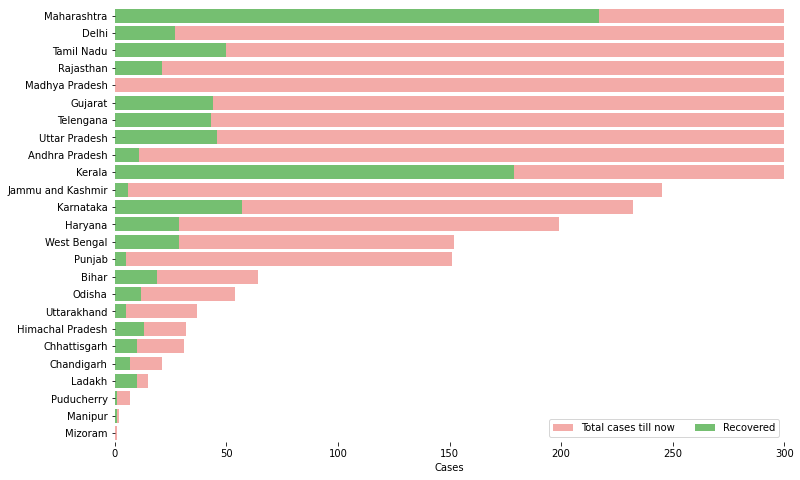

In [19]:
f, ax = plt.subplots(figsize = (12, 8))
data = data[["Name of State / UT","Total Cases in India","Cured","Death"]]

data.sort_values("Total Cases in India", ascending = False, inplace = True)


sns.set_color_codes("pastel")
sns.barplot(x="Total Cases in India", y="Name of State / UT", data=data,
            label="Total cases till now", color="r")


sns.set_color_codes("muted")
sns.barplot(x = "Cured", y = "Name of State / UT", data = data, label="Recovered", color="g")

ax.set(xlim=(0,300), ylabel="", xlabel="Cases")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

In [20]:
data

,Name of State / UT,Total Cases in India,Cured,Death
10,Maharashtra,1997,217,149
3,Delhi,1164,27,24
17,Tamil Nadu,1045,50,11
16,Rajasthan,806,21,3
9,Madhya Pradesh,564,0,36
4,Gujarat,518,44,25
18,Telengana,514,43,9
22,Uttar Pradesh,485,46,5
0,Andhra Pradesh,427,11,7
8,Kerala,390,179,2


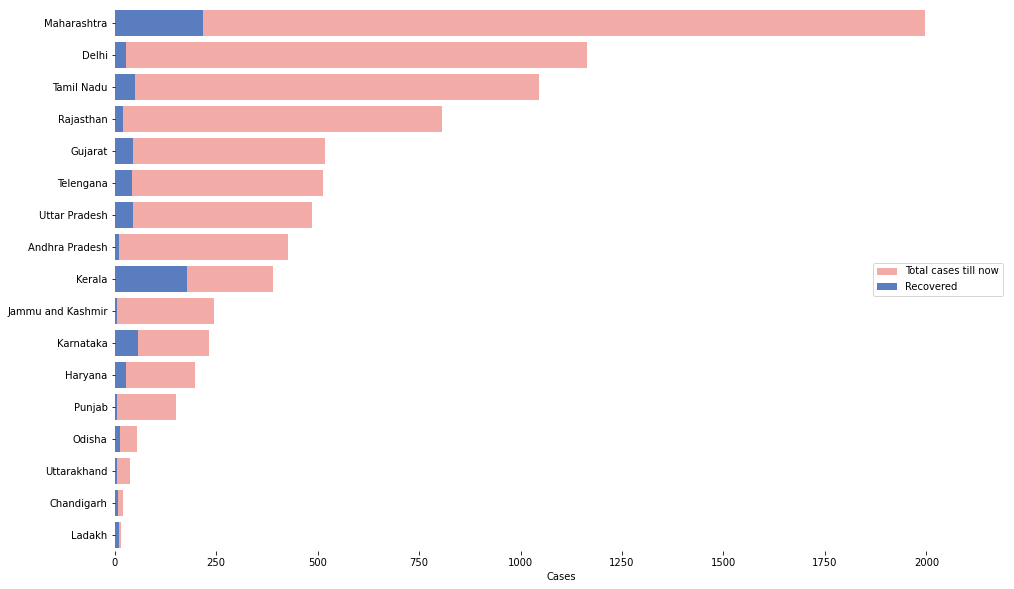

In [21]:
f, ax = plt.subplots(figsize=(16, 10))
data = data_full[['Name of State / UT','Total Cases in India','Cured','Death']]
data.sort_values('Total Cases in India',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases in India", y="Name of State / UT", data=data,
            label="Total cases till now", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data,
            label="Recovered", color="b")


# Add a legend and informative axis label
ax.legend(ncol=1, loc=5,frameon=True)
ax.set(xlim=(0, 2200), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)

In [0]:
import plotly
plotly.io.renderers.default="colab"

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Per_day["Date"], y=Per_day["Total Cases"], mode='lines+markers',name="Total Cases"))

fig.update_layout(title_text="Trend of Coronavirus in INDIA(Cumulative cases)",plot_bgcolor='rgb(230,230,230)')
fig.show()

# how new covid 19 cases reported in India
import plotly.express as px

fig = px.bar(Per_day, x="Date",y="New Cases", barmode = "group",height=400)

fig.update_layout(title_text="Coronavirus Cases in India on daily basis", plot_bgcolor='rgb(200,290,250)')

fig.show()



In [34]:
fig = px.bar(Per_day, x="Date",y="Total Cases", color="Total Cases", orientation='v',height=500,
             title="Confirmed Cases in India till now", color_discrete_sequence=px.colors.cyclical.IceFire)
fig.show()